<hr style="border:5px solid green"> </hr>


# Support Vector Machines - Class 07

For this lab, we'll apply support vector machines to the classic iris dataset.

### Include Functions, Load Data and set Gamma and Cost Hyperparameters

Setting hyperparameters at the top of the file gives you a way to find them and change them in a single place.

Iris is a classical dataset for doing classification.

In [5]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

iris = load_iris() # Load the iris dataset

# convert to a dataframe
tdf = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

tdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Separate into data and target

In [3]:
# Separate Features from Target
X = tdf.iloc[:, 0:4]   # load features into X DF
Y = tdf.iloc[:, 4]     # Load target into Y DF

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Split the data into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print('X train shape:{}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))

X train shape:(120, 4)
X test shape: (30, 4)


<hr style="border:3px solid green"> </hr>

## Linear SVM:

While scikit-learn has a separate function for linear SVC (Support Vector machine Classification), know that we can just use the non-linear option and tell it to use a linear-kernel.

- Linear SVM docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

- Non-lineaer SVM docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

<hr style="border:5px solid red"> </hr>

> **IMPORTANT** SEE THE DIFFERENCES IN THE NOTES BETWEEN THE TWO ABOVE FUNCTIONS.

<hr style="border:5px solid red"> </hr>

Summary:

- `LinearSVC` has a different solver (because we can assume linear kernel), this allows us to use powerful linear optimizers for solutions.

- `SVC` because of non-linear assumptions, sklearn uses approximate solvers, which may be computationally hard for larger samples ~(>10k). Alternatives are suggested there.

Text(0, 0.5, 'petal width (cm)')

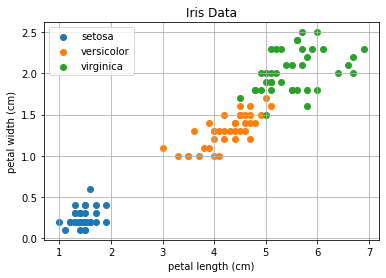

In [5]:
# First let's plot the 3 classes:
import matplotlib.pyplot as plt

# Column options are 'sepal/petal width/length (cm)'

x_col = 'petal length (cm)'
y_col = 'petal width (cm)'
labels = ['setosa', 'versicolor', 'virginica']

for target in y_train.unique().tolist():
    x_temp = X_train[y_train==target]
    plt.scatter(x_temp[x_col], x_temp[y_col], label=labels[int(target)])

plt.grid()
plt.title('Iris Data')
plt.legend()
plt.xlabel(x_col)
plt.ylabel(y_col)

## Linearly separable SVM

Notice there may be a viable linear separator between setosa and *non-setosa* on the two axes of petal width vs petal length.

To make sure NO points are allowed in the margin, we set the error-parameter, C, to a higher value (here we use 2.0).

In [6]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=2.0)

In [7]:
# Fitting on our axes:

# First designate wether class is setosa or not (y_target = 0 or else)
y_train2 = y_train==0.0

clf.fit(X_train[['petal length (cm)', 'petal width (cm)']], y_train2)

SVC(C=2.0, kernel='linear')

### Fancy plot time

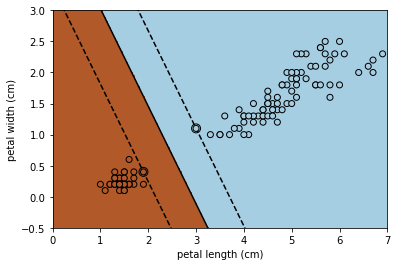

In [8]:
# Now get the margin lines:
y_min = -0.5
y_max = 3
x_min = 0
x_max = 7
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]

# From: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Construct the plot:
# plot the line, the points, and the nearest vectors to the plane
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.ylim((-0.5, 3))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10,
            edgecolors='k')
plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train2, zorder=10,
            cmap=plt.cm.Paired, edgecolors='k')

# Add a color mesh to the overlay:
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

## Linearly NON separable SVM

Let's look at sepal width vs sepal length:

Text(0, 0.5, 'sepal width (cm)')

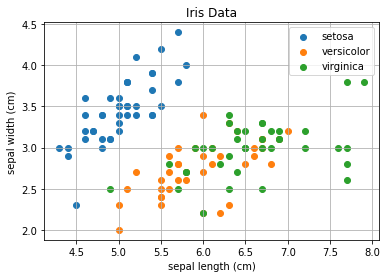

In [9]:
# Column options are 'sepal/petal width/length (cm)'

x_col = 'sepal length (cm)'
y_col = 'sepal width (cm)'
labels = ['setosa', 'versicolor', 'virginica']

for target in y_train.unique().tolist():
    x_temp = X_train[y_train==target]
    plt.scatter(x_temp[x_col], x_temp[y_col], label=labels[int(target)])

plt.grid()
plt.title('Iris Data')
plt.legend()
plt.xlabel(x_col)
plt.ylabel(y_col)

We do the same as before but we relax the error (lower C values).

In [10]:
clf = SVC(kernel='linear', C=0.5)

In [11]:
# Fitting on our axes:

# First designate wether class is setosa or not (y_target = 0 or else)
y_train2 = y_train==0.0

clf.fit(X_train[['sepal length (cm)', 'sepal width (cm)']], y_train2)

SVC(C=0.5, kernel='linear')

### Fancy plot time

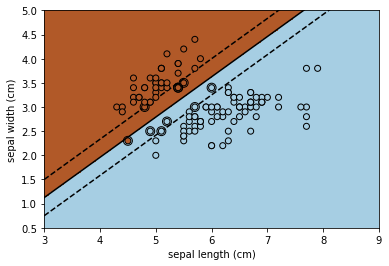

In [16]:
# Now get the margin lines:
y_min = 0.5
y_max = 5
x_min = 3
x_max = 9
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x_min, x_max)
yy = a * xx - (clf.intercept_[0]) / w[1]

# From: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Construct the plot:
# plot the line, the points, and the nearest vectors to the plane
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.ylim((y_min, y_max))
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10,
            edgecolors='k')
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train2, zorder=10,
            cmap=plt.cm.Paired, edgecolors='k')

# Add a color mesh to the overlay:
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

<hr style="border:3px solid green"> </hr>

## How to choose C?

Try some various C Values, look at generalization on test/validation set.

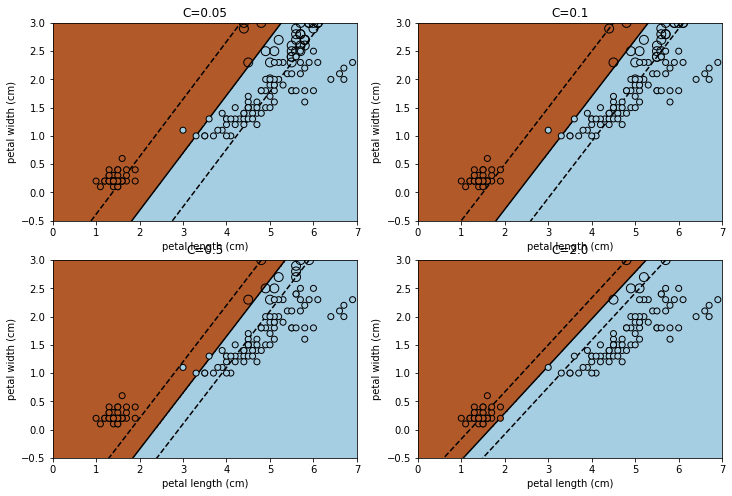

In [17]:
# Setup the various C values (only four of them, for plotting purposes)
c_vals = [0.05, 0.1, 0.5, 2.0]

# Designate setosa
y_train2 = y_train==0.0

# Start looping through for plotting:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
subplot = axs.ravel()
for ix, c in enumerate(c_vals):
    clf = SVC(kernel='linear', C=c)
    # fit model
    clf.fit(X_train[['sepal length (cm)', 'sepal width (cm)']], y_train2)
    y_min = -0.5
    y_max = 3
    x_min = 0
    x_max = 7
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(x_min, x_max)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    #plt.figure(ix, figsize=(4, 3))
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # Construct the plot:
    # plot the line, the points, and the nearest vectors to the plane
    #subplot[ix].clf()
    subplot[ix].plot(xx, yy, 'k-')
    subplot[ix].plot(xx, yy_down, 'k--')
    subplot[ix].plot(xx, yy_up, 'k--')
    subplot[ix].axis(ymin=y_min, ymax=y_max)
    subplot[ix].set_xlabel('petal length (cm)')
    subplot[ix].set_ylabel('petal width (cm)')
    subplot[ix].grid()
    subplot[ix].set_title('C={}'.format(c))

    subplot[ix].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10,
                edgecolors='k')
    subplot[ix].scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train2, zorder=10,
                cmap=plt.cm.Paired, edgecolors='k')

    # Add a color mesh to the overlay:
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    subplot[ix].pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    

<hr style="border:3px solid green"> </hr>

## Validation/Test Set for C-values

Let's look at the train/validation accuracy for various values of C.

> Note: We will use versicolor for a demonstration. Turns out since setosa is separable, accuracy == 1.0 always- margin just increases.

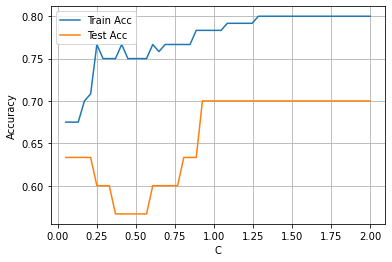

In [18]:
from sklearn.metrics import accuracy_score

# Designate Versicolor
y_train2 = y_train==1.0
y_test2 = y_test==1.0

# Define 50 various values of C
c_vals = np.linspace(0.05, 2.0, 50)

train_acc = []
test_acc = []

# Loop though C values
for ix, c in enumerate(c_vals):
    clf = SVC(kernel='linear', C=c)
    # fit model
    clf.fit(X_train, y_train2)
    
    # Get accuracy scores for both train/test
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    
    train_acc.append(accuracy_score(train_preds, y_train2))
    test_acc.append(accuracy_score(test_preds, y_test2))
    
# Plot values
plt.plot(c_vals, train_acc, label='Train Acc')
plt.plot(c_vals, test_acc, label='Test Acc')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

<hr style="border:3px solid green"> </hr>

## Non-Linear SVMs:


- Non-lineaer SVM docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


We will define both the C parameters and now a coefficient describing the multiplicative effect of the kernel.

(Having this in one location enables finding them more easily.)

In [19]:
# Define Penalty
cost = .9

# Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
gamma = 5

### Try Kernels
I'm creating a for loop so that I can test multiple kernels: polynomial, radial basis function and linear kernels against a linearSVC

In [20]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Test a LinearSVC (Different solver)
clf1 = svm.LinearSVC(C=cost).fit(X_train, y_train)
clf1.predict(X_test)
print("LinearSVC")
print(classification_report(clf1.predict(X_test), y_test))

# Test linear, rbf and poly kernels
for k in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost).fit(X_train, y_train)
    clf.predict(X_test)
    print(k)
    print(classification_report(clf.predict(X_test), y_test))

LinearSVC
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.73      0.89      0.80         9
         2.0       0.91      0.77      0.83        13

    accuracy                           0.87        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.88      0.87      0.87        30

linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.82      1.00      0.90         9
         2.0       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30

rbf
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.82      0.90      0.86        10
         2.0       0.91      0.83      0.87        12


/Users/nickmc/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<hr style="border:3px solid green"> </hr>

## Plot Different Kernels with 2 Features
In order to simplify the data visualization, I'm using only 2 features at a time. We can see because of the use of cost and gamma we've made the margins soft. 

First we'll plot features 1 and 2 and visualize the results.

In [21]:
# Reload iris data
(data, target) = load_iris(return_X_y=True)

/Users/nickmc/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


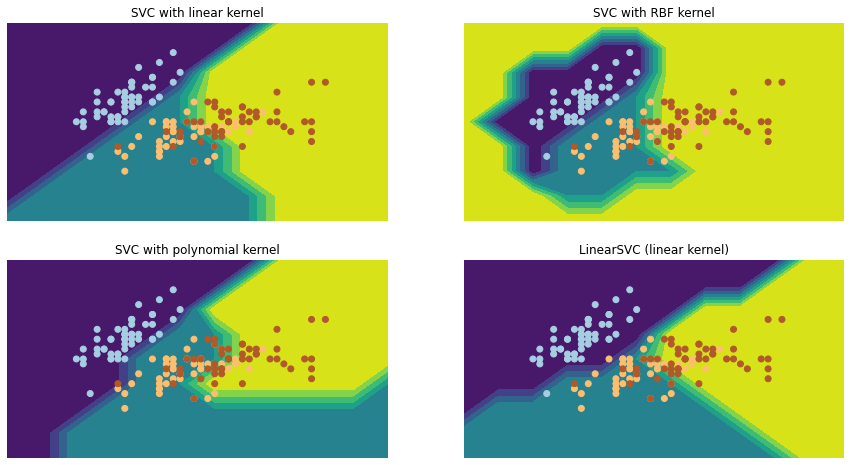

In [22]:
# To make plotting easier, let's just use two features.
X = data[:,:2]
Y = target

h = .5  # step size in the mesh
#cost = .9  # update the cost
#gamma = 10 # update the gamma 

# testing other kernels on unscaled data (for plotting tht support vectors)
svc = svm.SVC(kernel='linear', C=cost).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=gamma, C=cost).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', gamma=gamma, degree=3, C=cost).fit(X, Y)
lin_svc = svm.LinearSVC(C=cost).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel',
          'LinearSVC (linear kernel)']

for i, kernel in enumerate((svc, rbf_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = kernel.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    plt.axis('off')
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.title(titles[i])

plt.gcf().set_size_inches(15, 8)
plt.show()

Features one and two are not very good at creating separation

Let's try features 2 and 3 and plot the results

/Users/nickmc/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


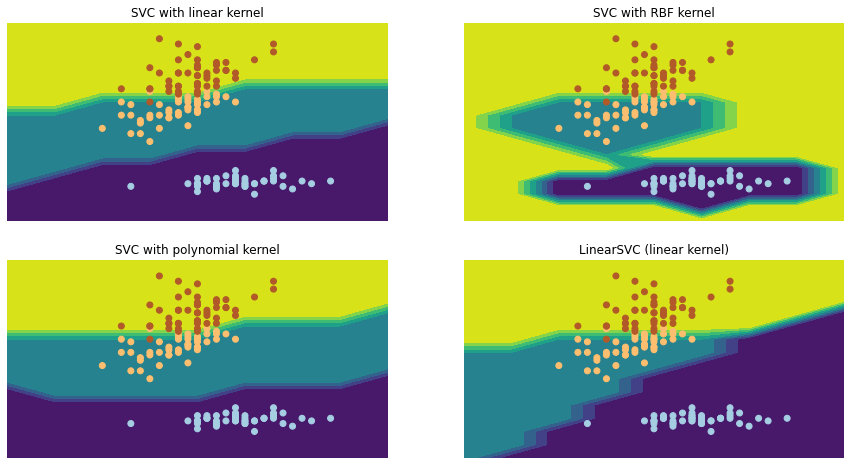

In [23]:
X1 = data[:, 1:3]

# testing other kernels on unscaled data (for plotting tht support vectors)
svc1 = svm.SVC(kernel='linear', C=cost).fit(X1, Y)
rbf_svc1 = svm.SVC(kernel='rbf', gamma=gamma, C=cost).fit(X1, Y)
poly_svc1 = svm.SVC(kernel='poly', degree=3, C=cost).fit(X1, Y)
lin_svc1 = svm.LinearSVC(C=cost).fit(X1, Y)

x1_min, x1_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y1_min, y1_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(y1_min, y1_max, h))

for i, kernel1 in enumerate((svc1, rbf_svc1, poly_svc1, lin_svc1)):
    plt.subplot(2, 2, i + 1)
    Z1 = kernel1.predict(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    plt.contourf(xx1, yy1, Z1)
    plt.axis('off')
    plt.scatter(X1[:, 0], X1[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.title(titles[i])

plt.gcf().set_size_inches(15, 8)
plt.show()

Features 2 and 3 are better than features 1 and 2. But how will they compare with 3 and 4?

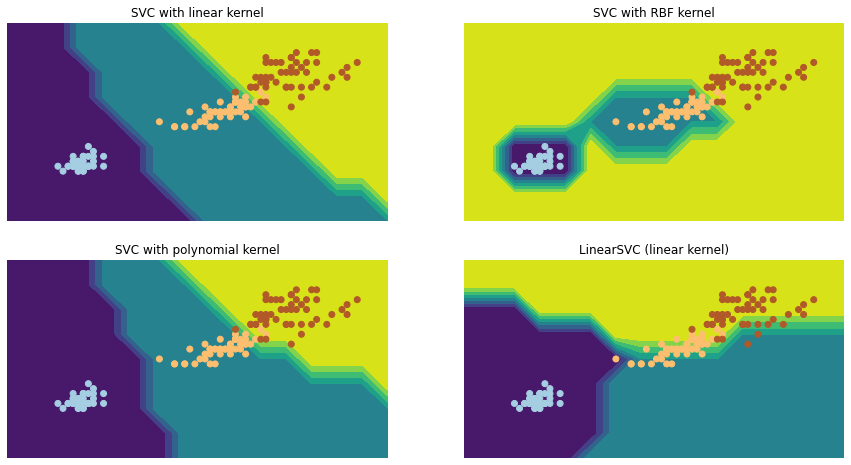

In [24]:
X2 = data[:, 2:4]

# testing other kernels on unscaled data (for plotting tht support vectors)
svc2 = svm.SVC(kernel='linear', C=cost).fit(X2, Y)
rbf_svc2 = svm.SVC(kernel='rbf', gamma=gamma, C=cost).fit(X2, Y)
poly_svc2 = svm.SVC(kernel='poly', C=cost).fit(X2, Y)
lin_svc2 = svm.LinearSVC(C=cost, tol=1e-6, max_iter=10000).fit(X2, Y)

x2_min, x2_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y2_min, y2_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, h),
                     np.arange(y2_min, y2_max, h))

for i, kernel2 in enumerate((svc2, rbf_svc2, poly_svc2, lin_svc2)):
    plt.subplot(2, 2, i + 1)
    Z2 = kernel2.predict(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    plt.contourf(xx2, yy2, Z2)
    plt.axis('off')
    plt.scatter(X2[:, 0], X2[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.title(titles[i])

plt.gcf().set_size_inches(15, 8)
plt.show()

<hr style="border:5px solid green"> </hr>

# Use all features

While it's nice to have just two features to plot, in reality, we'll have much more. We won't plot, but instead look at the accuracies.

We'll use the bank marketing dataset from homework:

As our data set, we use a bank marketing data, which has demographic and activity data about bank customers, as well as information about previous attempts to contact them for a marketing campain. The target `y` is binary and indicates whether the client signed up for a term deposit or not.

You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

In [25]:
import pandas as pd

bank = pd.read_csv("Bank Data.csv")
print(bank.shape)
bank.head()

(600, 11)


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


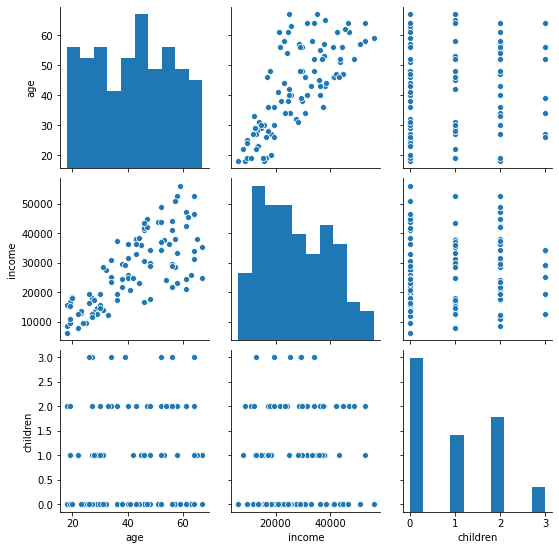

In [26]:
import seaborn as sns
sns.pairplot(bank.sample(100))

In [27]:
num_cols = bank.select_dtypes(['integer', 'float']).columns
cat_cols = bank.select_dtypes(['object']).drop(columns = "pep").columns

print("Numeric columns are {}.".format(", ".join(num_cols)))
print("Categorical columns are {}.".format(", ".join(cat_cols)))

Numeric columns are age, income, children.
Categorical columns are sex, region, married, car, save_act, current_act, mortgage.


<hr style="border:3px solid green"> </hr>

### Splitting data

We now need to split the data. SVMs can need a lot of tuning, so let's talk about splitting strategies. If we wanted to do our hyper-parameter tuning manually, then we would do a three-way split:

- the **training data** is used to train the model
- the **validation data** is used for **model selection**, i.e. to evaluate each model as we try different hyper-parameter combinations and select the best model, which we call the **final model**
- the **test data** is used to evaluate the final model so we have an unbiased estimate of its performance

To perform the three-way split, we first split the data into training and test data, and then further split the training data into training and validation.

<hr style="border:3px solid green"> </hr>

### Using Train/Test + Cross-validation

However, using `sklearn` there's another way that we can tune our hyper-parameters using only a two-way split and **cross-validation** (we explain this later in the notebook):

- the **training data** is used to **both** to train many models and select the best, i.e. the training data is both the training data and the validation data
- the **test data** is used to evaluate the final model so we have an unbiased estimate of its performance

As we will see later, `sklearn` will handle a lot of the complexity for us, so we don't have to write our own code to do the model training and selection. So let's split the data into training and test data:

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bank.drop(columns = "pep"), bank["pep"], 
                                                    test_size = 0.10, random_state = 42)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

print("Training data has {} rows.".format(X_train.shape[0]))
print("Test data has {} rows.".format(X_test.shape[0]))

Training data has 540 rows.
Test data has 60 rows.


<hr style="border:3px solid green"> </hr>

### One Hot Encoding:

Now we on-hot encode the categorical columns.

In [29]:
from sklearn.preprocessing import OneHotEncoder

onehoter = OneHotEncoder(sparse = False)
onehoter.fit(X_train[cat_cols])
onehot_cols = onehoter.get_feature_names(cat_cols)
X_train_onehot = pd.DataFrame(onehoter.transform(X_train[cat_cols]), columns = onehot_cols)
X_test_onehot = pd.DataFrame(onehoter.transform(X_test[cat_cols]), columns = onehot_cols)

X_train_onehot.head()

,sex_FEMALE,sex_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,save_act_NO,save_act_YES,current_act_NO,current_act_YES,mortgage_NO,mortgage_YES
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


<hr style="border:3px solid green"> </hr>

## LAB 01

### Normalizing features

Next we normalize our numeric features. It's important to normalize features when training an SVM algorithm.

In [30]:
from sklearn.preprocessing import StandardScaler

# Perform Z-standard normalization (to-> N(0,1))
znormalizer = StandardScaler()

# Fit on train set for numerical columns
znormalizer.fit(X_train[num_cols])

StandardScaler()

In [31]:
# Apply to train/test
X_train_norm = pd.DataFrame(znormalizer.transform(X_train[num_cols]), columns = num_cols)
X_test_norm = pd.DataFrame(znormalizer.transform(X_test[num_cols]), columns = num_cols)

X_train_norm.head()

,age,income,children
0,0.190935,-0.046800,-0.959907
1,-0.158810,0.782762,-0.959907
2,-1.068149,-0.702920,1.893395
3,0.750528,0.805599,-0.008806
4,-0.018912,-0.532458,-0.008806


In [32]:
print("Featurized training data has {} rows and {} columns.".format(*X_train_norm.shape))
print("Featurized test data has {} rows and {} columns.".format(*X_test_norm.shape))

Featurized training data has 540 rows and 3 columns.
Featurized test data has 60 rows and 3 columns.


<hr style="border:3px solid green"> </hr>

## LAB 02

### Benchmark/Baseline Model

Before we begin traning with SVMs, recall that SVMs are very compute heavy and may require a lot of tuning. While we do all this in search of the best model, it's worthwhile having a **baseline** against which we can compare performance. So we first train a logistic regression model and evalutate it. We chose logistic regression because it is efficient and does a good job even without much tuning.

In [33]:
X_train_featurized = X_train_onehot # add one-hot-encoded columns
X_test_featurized = X_test_onehot   # add one-hot-encoded columns
X_train_featurized[num_cols] = X_train_norm # add numeric columns
X_test_featurized[num_cols] = X_test_norm   # add numeric columns

In [34]:
from sklearn.linear_model import LogisticRegression

# Perform Logistic Regression.
logit = LogisticRegression(max_iter = 5000, solver='lbfgs')
logit.fit(X_train_featurized, y_train)


LogisticRegression(max_iter=5000)

In [35]:
y_hat_train = logit.predict(X_train_featurized)
y_hat_test = logit.predict(X_test_featurized)

In [36]:
# Because the problem is one of binary classification,
#   we will evaluate each model by looking at **precision** and **recall**.
from sklearn.metrics import precision_score, recall_score
precision_train = precision_score(y_train, y_hat_train, pos_label='YES') * 100
precision_test = precision_score(y_test, y_hat_test, pos_label='YES') * 100

recall_train = recall_score(y_train, y_hat_train, pos_label='YES') * 100
recall_test = recall_score(y_test, y_hat_test, pos_label='YES') * 100

print("Precision = {:.2f}% and recall = {:.2f}% on the training data.".format(precision_train, recall_train))
print("Precision = {:.2f}% and recall = {:.2f}% on the validation data.".format(precision_test, recall_test))

Precision = 64.52% and recall = 56.68% on the training data.
Precision = 50.00% and recall = 48.15% on the validation data.


We can see that as expected precision and recall are slightly worse on the validation data than the training data, but not by enough that we should be worried about overfitting. So no need to tune the logistic regression model. We will take it as-is and use its performance as the baseline performance.

<hr style="border:3px solid green"> </hr>

### SVM classifier

Let's now train an SVM model, with `SVC(gamma = 'scale')`

In [37]:
svmc = SVC(gamma = 'scale')
svmc.fit(X_train_featurized, y_train)

y_hat_train = svmc.predict(X_train_featurized)
y_hat_test = svmc.predict(X_test_featurized)

Let's evaluate the SVM model we got.

In [38]:
precision_train = precision_score(y_train, y_hat_train, pos_label='YES') * 100
precision_test = precision_score(y_test, y_hat_test, pos_label='YES') * 100

recall_train = recall_score(y_train, y_hat_train, pos_label='YES') * 100
recall_test = recall_score(y_test, y_hat_test, pos_label='YES') * 100

print("Precision = {:.0f}% and recall = {:.0f}% on the training data.".format(precision_train, recall_train))
print("Precision = {:.0f}% and recall = {:.0f}% on the validation data.".format(precision_test, recall_test))

Precision = 91% and recall = 79% on the training data.
Precision = 83% and recall = 70% on the validation data.


Again, SVMs have two important **high-level hyper-parameters** and then some lower-level ones that depend on the high-level ones. The high-level hyper-parameters are `C`, `kernel`. Depending on the choice of `kernel`, we can also specify `degree` and `gamma`. You can read more about that [here](https://scikit-learn.org/stable/modules/svm.html#kernel-functions).

In addition to the hyper-parameters mentioned above, `SVC` also has some important arguments such as `max_iter` and `class_weight`, or `cache_size` which we should be aware of.

<hr style="border:3px solid green"> </hr>

### Hyper parameter Tuning using GridSearch

We already did some hyper-parameter tuning in previous lectures, but we were a little loose about how we did it: (1) we didn't use a validation data like we should have, and (2) we had to write a lot of custom-code to collected results. If we try a few different models we can get away with being a little sloppy, but now we're going to do things right. You should not be surprised to find out that hyper-parameter tuning being a common ML task, there's functionality in `sklearn` to help us with it. 

There are three main ways to search the **hyper-parameter space**:

- **Grid search:** tries every combination of hyper-parameters
- **Random search:** tries a random subset of all combinations of hyper-parameters
- **Bayesian optimization:** tries a subset of all combinations of hyper-parameters (like random search) but does so in a more intelligent way, based on trading off the need to **explore** (trying a part of the hyper-parameter space thus far unexplored) and the need to **exploit** (focusing on a part of the hyper-parameter space that thus far seems promising)

We will use a grid search algorithm here. As a bonus, the grid search algorithm uses cross-validation (CV) to evaluate the model. Cross-validation can slow down the process, but we can use a lower number of **folds** to speed it up.

In [39]:
# This took about 30 seconds on my computer.

from sklearn.model_selection import GridSearchCV
    
hyper_parameter_space = {'kernel': ['poly'], 
                         'degree': [2, 3],
                         'C': [1, 3, 10], 
                         'gamma': [1, 5]}

svc = SVC(gamma = "scale", probability = False, cache_size = 1024)
clf = GridSearchCV(svc, hyper_parameter_space, 
                   cv = 5, refit = True, 
                   return_train_score = True,
                   n_jobs = 4, verbose = 10)

clf.fit(X_train_featurized, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   24.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   34.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:   34.4s finished


GridSearchCV(cv=5, estimator=SVC(cache_size=1024), n_jobs=4,
             param_grid={'C': [1, 3, 10], 'degree': [2, 3], 'gamma': [1, 5],
                         'kernel': ['poly']},
             return_train_score=True, verbose=10)

All the results generated form the work done by the grid search is stored in the `cv_results_` attribute. For example, if we want to know the combination of hyper-parameters that was tried in the 9th iteration, we can run this:

In [40]:
clf.cv_results_['params'][9]

{'C': 10, 'degree': 2, 'gamma': 5, 'kernel': 'poly'}

And if we want to know the cross-validated evaluation score for that 9th itearation, we can run this:

In [41]:
clf.cv_results_['mean_test_score'][9]

0.8018518518518519

We need to be careful about terminology here. Unfortunately, the hyper-parameters are called `params` by `GridSearchCV`. But in ML **parameters** are the things that the algorithm learns from the data (such as the coefficients in the prediction equation), whereas **hyper-parameters** cannot be learned from the data, which is why we have to tune them by trying different combination. Also, the cross-validated score is called `mean_test_score` even though we are not using the test data to evaluate it. At least not during model selection. We will use the test data later to evaluate the final model.


Time to pull the best model. We can explicitly call `clf.best_estimator_`. 

In [42]:
clf.best_estimator_

SVC(C=1, cache_size=1024, degree=2, gamma=1, kernel='poly')

> Calling `clf.best_estimator_` explicitly is not necessary: by calling `clf` itself it is **implied** that we are calling the best estimator. One way we can check that is by comparing `clf.best_estimator_` with `clf.estimator`. These two estimators should be the same, confirming that the `estimator` method is set the `best_estimator_` once training is done.

In [43]:
clf.estimator

SVC(cache_size=1024)

This means that if we call `clf.predict`, we would be using the best estimator to get predictions.

In [44]:
y_hat_train = clf.predict(X_train_featurized)
y_hat_test = clf.predict(X_test_featurized)

<hr style="border:3px solid green"> </hr>

### Evaluate best model

Let's now get the precision and recall of the best estimator to see how they compare to what we got from logistic regression.

In [45]:
precision_train = precision_score(y_train, y_hat_train, pos_label = 'YES') * 100
precision_test = precision_score(y_test, y_hat_test, pos_label = 'YES') * 100

recall_train = recall_score(y_train, y_hat_train, pos_label = 'YES') * 100
recall_test = recall_score(y_test, y_hat_test, pos_label = 'YES') * 100

print("Precision = {:.0f}% and recall = {:.0f}% on the training data.".format(precision_train, recall_train))
print("Precision = {:.0f}% and recall = {:.0f}% on the validation data.".format(precision_test, recall_test))

Precision = 89% and recall = 87% on the training data.
Precision = 78% and recall = 78% on the validation data.


For grid search we set `probability = True` so we can get ROC curve and compare the best model to logistic regression. However, setting `probability = True` slows down training considerably, so it's not a good idea to use it during grid search. Instead, we should retrain the final model using the hyper-pramaters combinations that we found and set `probability = True` to get soft predictions.

In [46]:
svc = SVC(gamma = "scale", probability = True)
svc.fit(X_train_featurized, y_train)

SVC(probability=True)

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(models, model_names):
    plt.figure(0, figsize = [8, 7]).clf()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for ii, model in enumerate(models):
        y_prob_test = model.predict_proba(X_test_featurized)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_prob_test, pos_label = "YES")
        roc_auc = auc(fpr, tpr)

        fpr, tpr, threshold = roc_curve(y_test, y_prob_test, pos_label = "YES")
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = "{} AUC = {:0.2f}".format(model_names[ii], roc_auc))

    plt.legend(loc = 'lower right')
    plt.show()

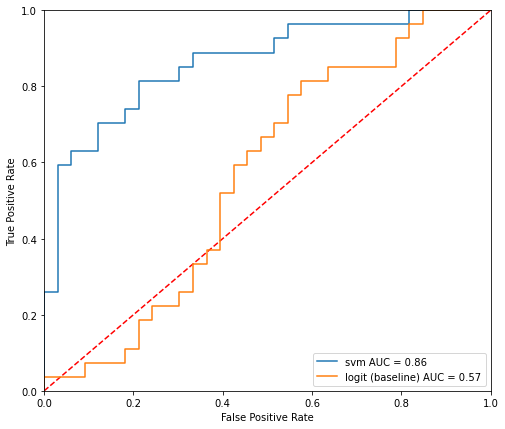

In [48]:
plot_roc([svc, logit], ['svm', 'logit (baseline)'])

An ROC curve for a single classifer is not very useful, but it's when we want to compare multiple classifiers that the ROC curve can save us a lot of time. Since creating an ROC curve can be tedious, the above cell has a function that does the hard work. When we call the function, all we need to do is give it the models we trained, in a list, and corresponding labels for each. In addition to plotting the ROC curve, the plot will also show the AUC (area under the ROC curve). The closer the AUC is to 1, the better the model.

<hr style="border:5px solid green"> </hr>

# Total Regression (SVM Regression)

Here we will illustrate how to perform total regression.

As a reminder, here we want:

$$
\min \frac{1}{2}||w||^{2}
$$

subject to

$$
|y_{i} - w^{T}x - b| \leq \epsilon
$$

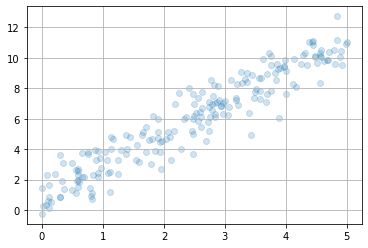

In [49]:
# Generate sample data
X = 5 * np.random.rand(200, 1)
y = (2.0 * X + 1).reshape([-1])

# Add noise to targets
y += np.random.normal(0, 1, X.shape[0])

X_plot = np.linspace(0, 5, 100000)[:, None]

plt.scatter(X, y, alpha=0.2)
plt.grid()

In [50]:
from sklearn.svm import SVR

# Train on sample
train_size = 100

svr_linear = SVR(kernel='linear')
svr_linear.fit(X[:train_size], y[:train_size])

SVR(kernel='linear')

In [51]:
# Get line fit
y_svr = svr_linear.predict(X_plot)
y_true = 2.0 * X_plot + 1.0

# Get support vectors
sv_ind = svr_linear.support_
sv_ind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 53,
       54, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 95, 96, 97, 98, 99], dtype=int32)

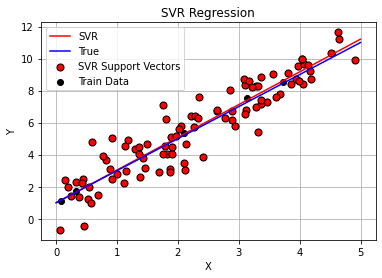

In [55]:
# Plot fit
# Get support vectors
plt.scatter(X[sv_ind], y[sv_ind], c='red', s=50, label='SVR Support Vectors', zorder=2, edgecolors=(0, 0, 0))
# Plot training data
plt.scatter(X[:train_size], y[:train_size], c='black', label='Train Data', zorder=1, edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='red',label='SVR')
plt.plot(X_plot, y_true, c='blue',label='True')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVR Regression')
plt.legend()

## SVM Regression on Non-Linear Data

Do the above, but use kernel trick to learn non-linear fit.

Probably helpful to introduce grid-search.

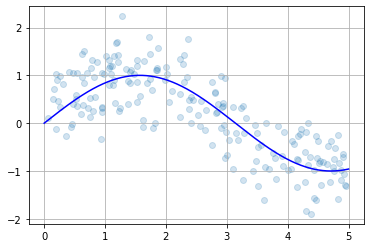

In [52]:
from sklearn.model_selection import GridSearchCV

# Generate sample data
X = 5 * np.random.rand(200, 1)
y = np.sin(X).reshape([-1])

# Add noise to targets
y += np.random.normal(0, 0.5, X.shape[0])

X_plot = np.linspace(0, 5, 100000)[:, None]
y_true = np.sin(X_plot)

plt.scatter(X, y, alpha=0.2)
plt.plot(X_plot, y_true, color='blue')
plt.grid()

In [53]:
from sklearn.svm import SVR

# Train on sample
train_size = 100

# RBF, or Gaussian kernel is a good start
svr_non_linear = GridSearchCV(SVR(kernel='rbf'), 
                              param_grid={"C": [1.0, 10, 100, 200],
                                          "gamma": [0.01, 0.1, 1.0,]})
svr_non_linear.fit(X[:train_size], y[:train_size])

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.0, 10, 100, 200], 'gamma': [0.01, 0.1, 1.0]})

In [54]:
svr_non_linear.best_estimator_

SVR(gamma=0.1)

In [55]:
# Get fit
y_svr = svr_non_linear.predict(X_plot)

# Get support vectors
sv_ind = svr_non_linear.best_estimator_.support_
sv_ind

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 73, 74,
       75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94,
       95, 96, 97, 98, 99], dtype=int32)

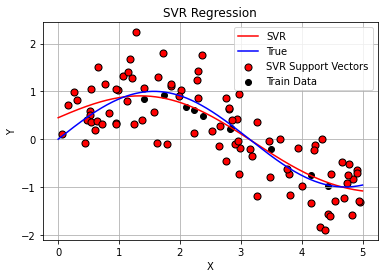

In [56]:
# Plot fit
# Get support vectors
plt.scatter(X[sv_ind], y[sv_ind], c='red', s=50, label='SVR Support Vectors', zorder=2, edgecolors=(0, 0, 0))
# Plot training data
plt.scatter(X[:train_size], y[:train_size], c='black', label='Train Data', zorder=1, edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='red',label='SVR')
plt.plot(X_plot, y_true, c='blue',label='True')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVR Regression')
plt.legend()

## To try:

Go back and try different non-linear kernels: `poly`, `sigmoid`, and `rbf`.

# Image Recognition Example for SVMs

We will attempt to do image recognition at a small scale using MNIST **FASHION** data set:

Fashion image dataset information:

https://github.com/zalandoresearch/fashion-mnist

The Fashion image dataset is an alternative to the overused digit classification set.


Lucky for us, many python libraries have this dataset built in. If you're running this for the first time, the `load_data()` function will need internet access to download the images locally.

In [57]:
import tensorflow as tf
# Wait for 4 downloads to finish.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [58]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [59]:
# What is this like?
# Shape?
print(x_train.shape)
# Part of the 1st image?
print(x_train[0,10:15,10:15])
# Max value?
print(x_train.max())

(60000, 28, 28)
[[  0   0   0 193 228]
 [  3   0  12 219 220]
 [  6   0  99 244 222]
 [  0   0  55 236 228]
 [  0   0 237 226 217]]
255


Text(0.5, 1.0, '9')

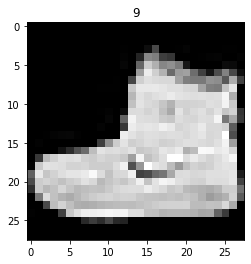

In [60]:
# Plot an image
plt.gray()
plt.imshow(x_train[0,:,:])
plt.title(y_train[0])

### Info on labels:

From :  https://keras.io/api/datasets/fashion_mnist/


|  Label  |  Description  |
|:-------:|:-------------:|
|    0    |  T-shirt/top  |
|    1    |  Trouser      |
|    2    |  Pullover     |
|    3    |  Dress        |
|    4    |  Coat         |
|    5    |  Sandal       |
|    6    |  Shirt        |
|    7    |  Sneaker      |
|    8    |  Bag          |
|    9    |  Ankle boot   |

In [61]:
# Need a 1D array of inputs, we have 2D arrays of inputs.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
# Transform/flatten x-test
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print(x_train.shape)

(60000, 784)


In [65]:
# TOO MUCH DATA.  So we will sample 5k from training set.

sample_size = 5000
x_other, xs_train, y_other, ys_train = train_test_split(x_train, y_train, test_size=sample_size)

print('x shape: {}'.format(xs_train.shape))
print('y shape: {}'.format(ys_train.shape))

# Check distribution of targets
unique, counts = np.unique(ys_train, return_counts=True)

print(np.asarray((unique, counts)).T)

x shape: (5000, 784)
y shape: (5000,)
[[  0 484]
 [  1 501]
 [  2 505]
 [  3 514]
 [  4 505]
 [  5 484]
 [  6 453]
 [  7 506]
 [  8 514]
 [  9 534]]


In [83]:
# Train model: (~30 seconds on my laptop)
#. Remember:
#.   - Gamma: Higher = Less Regularization.  Lower = More Regularization.
#.   - C:     Higher = More Regularization.  Lower = Less Regularization
clf = svm.SVC(gamma=0.2, C=0.5, kernel='poly')
clf.fit(xs_train, ys_train)

# As a side note, I tried a few different settings for the 'rbf' kernel and could not get any good solutions.

SVC(C=0.5, gamma=0.2, kernel='poly')

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Get predictions (~20-30 seconds on my laptop)
pred_test = clf.predict(x_test)

# Report accuracy and confusion matrix
test_acc = accuracy_score(y_test, pred_test)

print('Test set accuracy: {:.4f}'.format(test_acc))

# Confusion Matrix
conf_df = pd.DataFrame(confusion_matrix(y_test, pred_test), columns=clf.classes_, index=clf.classes_)

conf_df

Test set accuracy: 0.8048


,0,1,2,3,4,5,6,7,8,9
0,743,3,19,48,8,6,158,0,14,1
1,12,949,8,22,3,0,5,0,1,0
2,22,3,714,9,125,0,114,0,11,2
3,66,27,21,798,41,1,38,0,8,0
4,4,4,176,50,673,0,82,0,10,1
5,2,0,2,4,0,889,2,52,9,40
6,172,3,135,25,105,3,527,0,30,0
7,0,0,0,0,0,63,0,893,0,44
8,12,2,13,5,5,12,17,7,922,5
9,1,1,0,0,0,18,0,37,3,940
